In [5]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load the image in grayscale


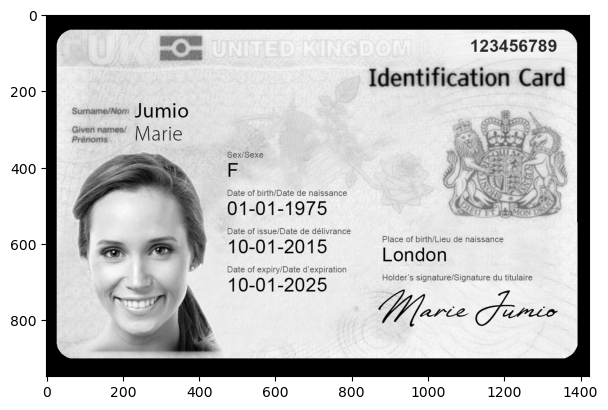

In [30]:
img_path = "qq3.webp"
img = cv2.imread(img_path, 0)

plt.figure(figsize=(7,5))
plt.imshow(img,'gray')

# 2) Resizeg the image


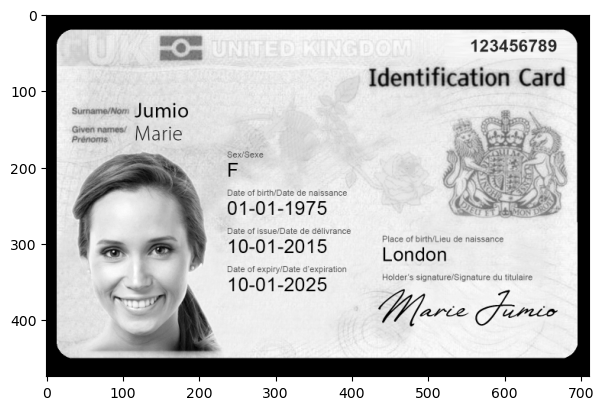

In [31]:
img_resize = cv2.resize(img, (None), fx = 0.5, fy = 0.5)
plt.figure(figsize=(7,5))
plt.imshow(img_resize,'gray')

# 3) Thresholding


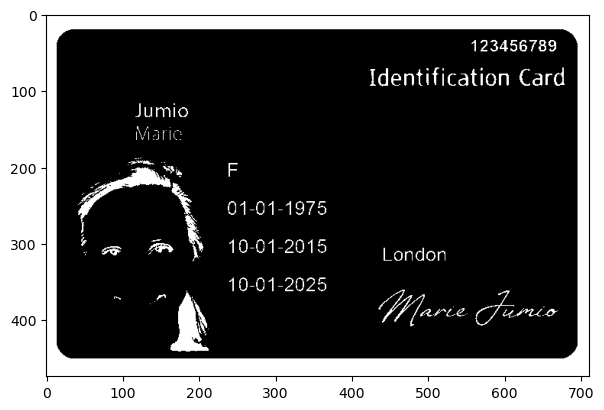

In [32]:
_, img_thresh1 = cv2.threshold(img_resize, 70, 140, cv2.THRESH_BINARY_INV)
plt.figure(figsize=(7,5))
plt.imshow(img_thresh1,'gray')

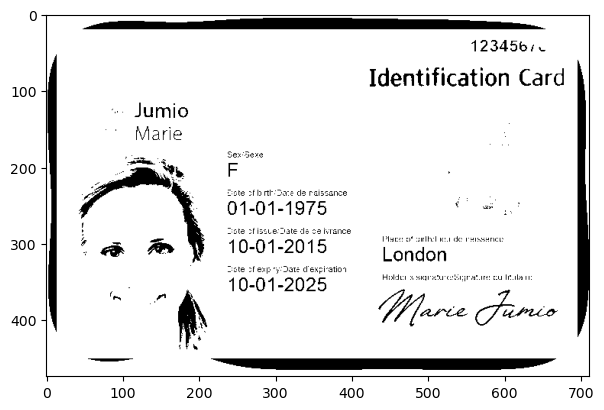

In [33]:
img_thresh2 = cv2.adaptiveThreshold(img_resize, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 281, 81)

plt.figure(figsize=(7,5))
plt.imshow(img_thresh2, "gray")

# 4) Morphological Transformations


(<matplotlib.image.AxesImage at 0x2e456e1b3d0>,
 Text(0.5, 1.0, 'opening image'))

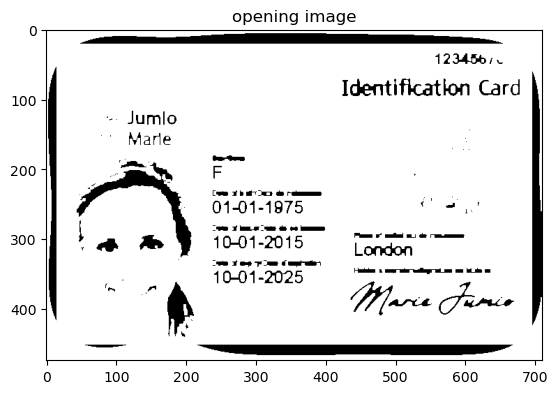

In [34]:
kernel = np.ones((4,4),np.uint8)
opening_img = cv2.morphologyEx(img_thresh2, cv2.MORPH_OPEN, kernel)
plt.imshow(opening_img, "gray"), plt.title("opening image")

(<matplotlib.image.AxesImage at 0x2e456f93990>,
 Text(0.5, 1.0, 'Dilation image'))

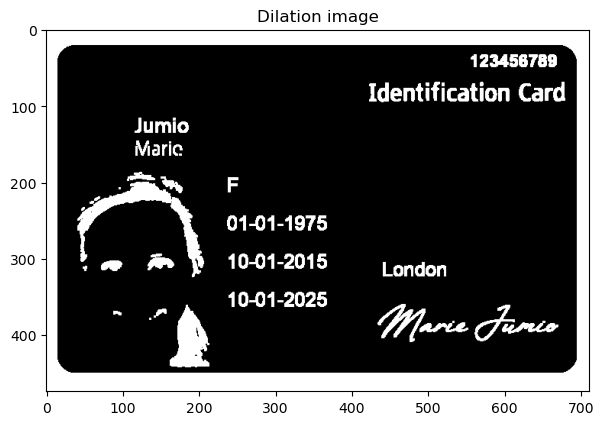

In [35]:
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(img_thresh1, kernel, iterations = 1)

plt.figure(figsize=(7,5))
plt.imshow(dilation, "gray"), plt.title("Dilation image")

In [36]:
from PIL import Image

import pytesseract

In [54]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
config='--psm 11 '
text = pytesseract.image_to_string(dilation, lang='eng', config=config)
#print(text)

In [52]:
print(text.splitlines()[16])

London


In [53]:
columns_lst = [["first name", "last name", "Address", "Date of birth"],
               [text.splitlines()[4], text.splitlines()[6], text.splitlines()[16], text.splitlines()[10]]]

df = pd.DataFrame(columns_lst, columns=["first name", "last name", "Address", "Date of birth"])
df = df.drop(0)
df

,first name,last name,Address,Date of birth
1,Jumio,Marie,London,01-01-1975
